### 1. 데이터 로딩 및 확인 / 데이터 준비

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step: 


In [4]:
raw_test = test_labels
raw_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 2. 모델링

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))  #(3,3)은 필터크기
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [8]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.1675 - accuracy: 0.9473
Epoch 2/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.0476 - accuracy: 0.9851
Epoch 3/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.0329 - accuracy: 0.9899
Epoch 4/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.0244 - accuracy: 0.9921
Epoch 5/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.0207 - accuracy: 0.9934


In [10]:
#성능평가
test_loss, test_acc= model.evaluate(test_images, test_labels)
print(test_acc)

10000/10000 [==============================] - 1s 84us/step
0.9914000034332275


In [11]:
preds = model.predict_classes(test_images)

In [12]:
preds

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [13]:
len(preds[preds != raw_test])

86

In [14]:
[i for i,x in enumerate(preds != raw_test) if x]

[115,
 445,
 447,
 449,
 492,
 543,
 726,
 882,
 938,
 947,
 969,
 1014,
 1039,
 1114,
 1226,
 1242,
 1247,
 1260,
 1299,
 1364,
 1414,
 1527,
 1530,
 1681,
 1782,
 1901,
 2035,
 2053,
 2070,
 2109,
 2130,
 2135,
 2293,
 2329,
 2447,
 2462,
 2597,
 2654,
 2742,
 2771,
 2927,
 2953,
 3073,
 3225,
 3289,
 3422,
 3451,
 3520,
 3681,
 3718,
 3727,
 3762,
 3808,
 4007,
 4027,
 4176,
 4350,
 4507,
 4571,
 4639,
 4699,
 4740,
 4823,
 4838,
 4860,
 5165,
 5634,
 5955,
 5981,
 5997,
 6532,
 6576,
 6597,
 6625,
 6651,
 8408,
 8527,
 9634,
 9642,
 9664,
 9669,
 9679,
 9729,
 9792,
 9905,
 9922]

정답: 6
예측: 0


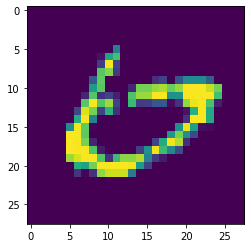

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
i = 445
print('정답:', raw_test[i])
print('예측:', preds[i])
plt.imshow(test_images[i,:,:,0]);

정답: 4
예측: 9


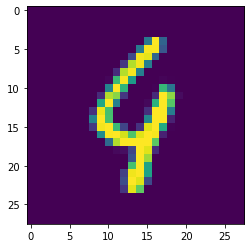

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
i = 115
print('정답:', raw_test[i])
print('예측:', preds[i])
plt.imshow(test_images[i,:,:,0]);

# CAT vs. DOG

### 1. Base Model 생성

##### 1) 데이터 준비

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'data/cats_and_dogs/train'
validation_dir = 'data/cats_and_dogs/validation'

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150,150),
                  batch_size = 20,
                  class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
                   validation_dir,
                   target_size = (150,150),
                   batch_size = 20,
                   class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


##### 2) 모델 정의

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

##### 3) 모델 시각화

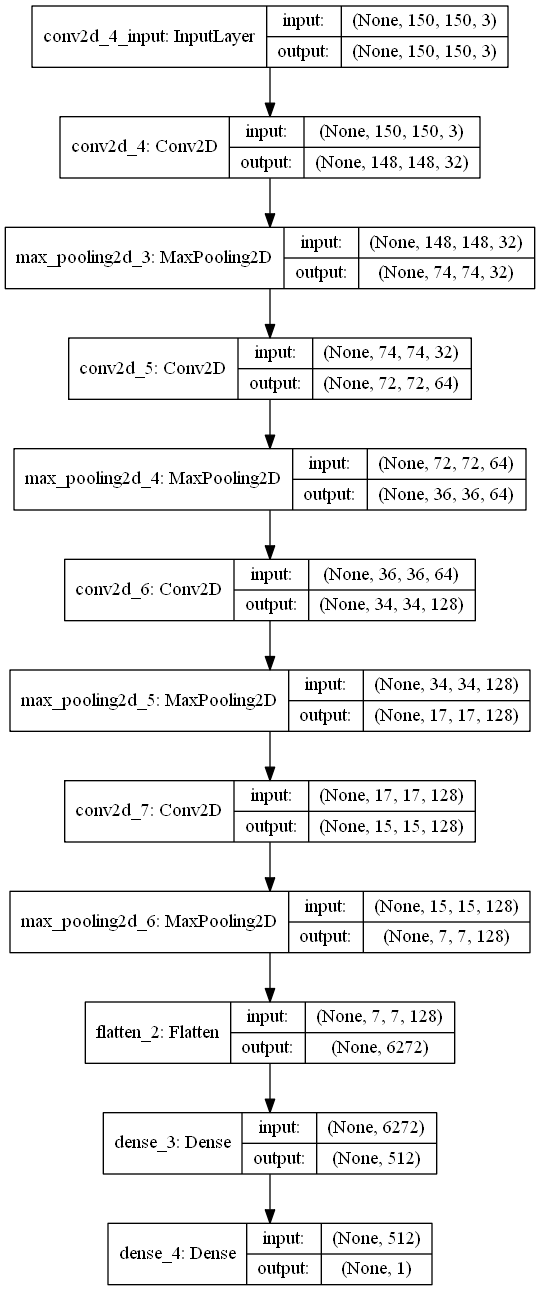

In [22]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [24]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

In [25]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data = validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 33s 333ms/step - loss: 0.6851 - accuracy: 0.5420 - val_loss: 0.6811 - val_accuracy: 0.5830
Epoch 2/30
100/100 [==============================] - 7s 69ms/step - loss: 0.6427 - accuracy: 0.6400 - val_loss: 0.8092 - val_accuracy: 0.5010
Epoch 3/30
100/100 [==============================] - 7s 68ms/step - loss: 0.6030 - accuracy: 0.6765 - val_loss: 0.6063 - val_accuracy: 0.6410
Epoch 4/30
100/100 [==============================] - 7s 68ms/step - loss: 0.5583 - accuracy: 0.7210 - val_loss: 0.5162 - val_accuracy: 0.6760
Epoch 5/30
100/100 [==============================] - 7s 69ms/step - loss: 0.5279 - accuracy: 0.7355 - val_loss: 0.4519 - val_accuracy: 0.6870
Epoch 6/30
100/100 [==============================] - 7s 69ms/step - loss: 0.4988 - accuracy: 0.7620 - val_loss: 0.6202 - val_accuracy: 0.6860
Epoch 7/30
100/100 [==============================] - 7s 70ms/step - loss: 0.4617 - accuracy: 0.7940 - val_loss: 0.4669 - val_accuracy: 0.71

In [26]:
model.save('cats_and_dogs_small_1.h5')

C:\Users\siras\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [27]:
import matplotlib.pyplot as plt

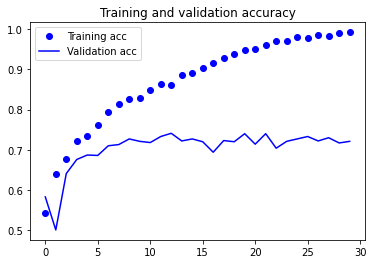

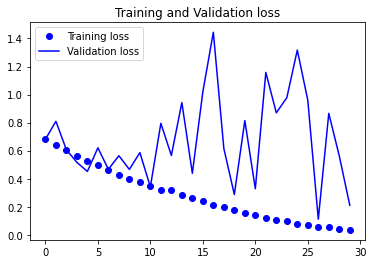

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### 2. 데이터 증식

In [29]:
datagen = ImageDataGenerator(
           rotation_range=20,
           width_shift_range=0.1,
           height_shift_range=0.1,
           shear_range=0.1,
           zoom_range=0.1,
           horizontal_flip=True,
           fill_mode = 'nearest')

In [30]:
from keras.preprocessing import image
import os
import matplotlib.pyplot as plt
%matplotlib inline

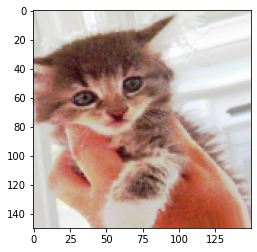

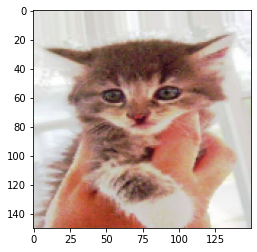

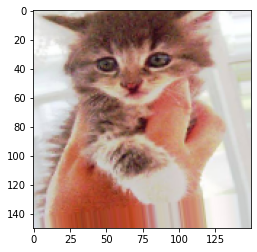

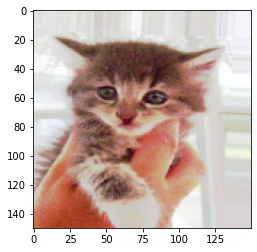

In [31]:
train_cats_dir = 'data/cats_and_dogs/train/cats'

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 ==0:
        break
        
plt.show()

In [34]:
train_dir = 'data/cats_and_dogs/train'
validation_dir = 'data/cats_and_dogs/validation'

train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150,150),
                  batch_size=32,
                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                       validation_dir,
                       target_size=(150,150),
                       batch_size=32,
                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

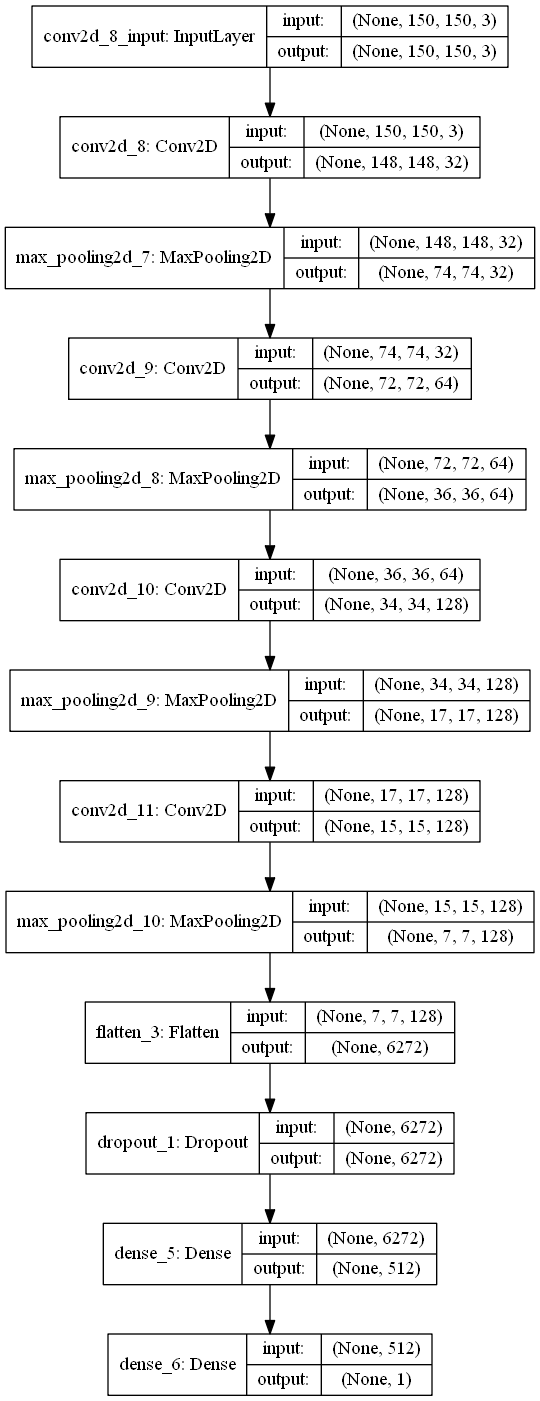

In [36]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [37]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.0001),
              metrics=['accuracy'])

In [38]:
history = model.fit_generator(
           train_generator,
           steps_per_epoch=100,
           epochs=100,
           validation_data=validation_generator,
           validation_steps=50)

Epoch 1/100
100/100 [==============================] - 24s 240ms/step - loss: 0.6917 - accuracy: 0.5148 - val_loss: 0.7440 - val_accuracy: 0.4981
Epoch 2/100
100/100 [==============================] - 22s 220ms/step - loss: 0.6827 - accuracy: 0.5600 - val_loss: 0.6446 - val_accuracy: 0.6205
Epoch 3/100
100/100 [==============================] - 22s 215ms/step - loss: 0.6702 - accuracy: 0.5835 - val_loss: 0.6094 - val_accuracy: 0.5964
Epoch 4/100
100/100 [==============================] - 22s 221ms/step - loss: 0.6502 - accuracy: 0.6175 - val_loss: 0.6260 - val_accuracy: 0.6192
Epoch 5/100
100/100 [==============================] - 22s 217ms/step - loss: 0.6342 - accuracy: 0.6357 - val_loss: 0.5544 - val_accuracy: 0.6745
Epoch 6/100
100/100 [==============================] - 24s 235ms/step - loss: 0.6175 - accuracy: 0.6622 - val_loss: 0.6482 - val_accuracy: 0.6727
Epoch 7/100
100/100 [==============================] - 22s 216ms/step - loss: 0.6066 - accuracy: 0.6696 - val_loss: 0.5414 -

In [39]:
model.save('cats_and_dogs_small_2.h5')

C:\Users\siras\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


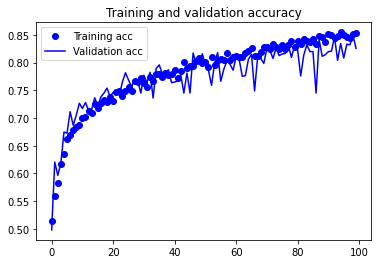

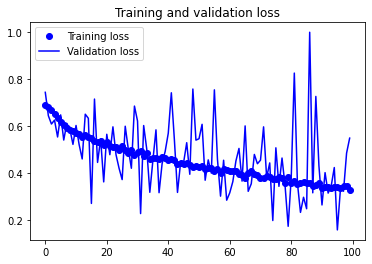

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 3. 전이학습

In [41]:
from keras.applications import VGG16

In [42]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

58892288/58889256 [==============================] - 10s 0us/step


In [43]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### 1) 데이터 증식을 사용하지 않은 특성 추출

In [45]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [49]:
train_dir = 'data/cats_and_dogs/train'
validation_dir = 'data/cats_and_dogs/validation'
test_dir = 'data/cats_and_dogs/test'

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
                directory,
                target_size=(150,150),
                batch_size = batch_size,
                class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [50]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.00002),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 465us/step - loss: 0.0539 - acc: 0.9805 - val_loss: 2.5874e-04 - val_acc: 1.0000
Epoch 2/30
2000/2000 [==============================] - 1s 416us/step - loss: 9.6489e-05 - acc: 1.0000 - val_loss: 1.9918e-06 - val_acc: 1.0000
Epoch 3/30
2000/2000 [==============================] - 1s 408us/step - loss: 1.2589e-06 - acc: 1.0000 - val_loss: 6.8573e-08 - val_acc: 1.0000
Epoch 4/30
2000/2000 [==============================] - 1s 410us/step - loss: 1.1358e-07 - acc: 1.0000 - val_loss: 1.5691e-08 - val_acc: 1.0000
Epoch 5/30
2000/2000 [==============================] - 1s 405us/step - loss: 3.7995e-08 - acc: 1.0000 - val_loss: 6.5853e-09 - val_acc: 1.0000
Epoch 6/30
2000/2000 [==============================] - 1s 407us/step - loss: 2.5220e-08 - acc: 1.0000 - val_loss: 3.4300e-09 - val_acc: 1.0000
Epoch 7/30
2000/2000 [==============================] - 1s 405us/step - loss: 1.5187e-08 - a

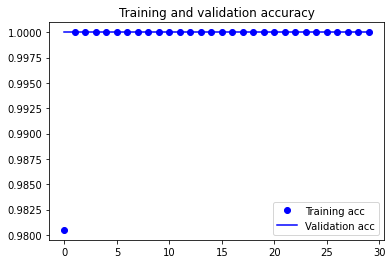

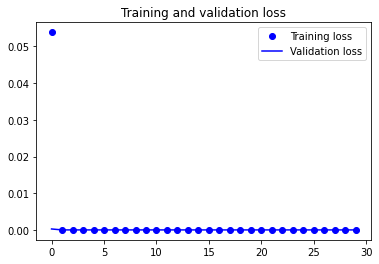

In [52]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [53]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [54]:
print('conv_base를 동결하기 전 가중치의 수:', len(model.trainable_weights))
conv_base.trainable = False
print('conv_base를 동결한 후 가중치의 수:', len(model.trainable_weights))

conv_base를 동결하기 전 가중치의 수: 30
conv_base를 동결한 후 가중치의 수: 4


In [55]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 23s 229ms/step - loss: 0.5367 - acc: 0.7480 - val_loss: 0.4308 - val_acc: 0.8360
Epoch 2/30
100/100 [==============================] - 22s 215ms/step - loss: 0.4096 - acc: 0.8355 - val_loss: 0.2501 - val_acc: 0.8470
Epoch 3/30
100/100 [==============================] - 21s 215ms/step - loss: 0.3506 - acc: 0.8660 - val_loss: 0.2284 - val_acc: 0.8850
Epoch 4/30
100/100 [==============================] - 21s 215ms/step - loss: 0.3210 - acc: 0.8660 - val_loss: 0.2275 - val_acc: 0.8900
Epoch 5/30
100/100 [==============================] - 22s 216ms/step - loss: 0.3024 - acc: 0.8800 - val_loss: 0.3434 - val_acc: 0.8970
Epoch 6/30
100/100 [==============================] - 22s 215ms/step - loss: 0.2909 - acc: 0.8800 - val_loss: 0.2631 - val_acc: 0.8990
Epoch 7/30
100/100 [==============================] - 22s 216ms/step - loss: 0.2779 - acc: 0.8860 - val_lo

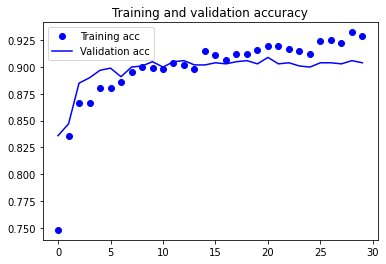

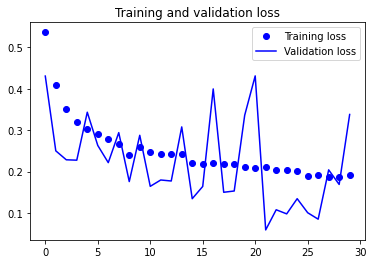

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

### 2) 데이터 증식을 사용한 특성 추출

In [57]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [58]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [59]:
print('conv_base를 동결하기 전 가중치의 수:', len(model.trainable_weights))
conv_base.trainable = False
print('conv_base를 동결한 후 가중치의 수:', len(model.trainable_weights))

conv_base를 동결하기 전 가중치의 수: 4
conv_base를 동결한 후 가중치의 수: 4


In [60]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 22s 218ms/step - loss: 0.5259 - acc: 0.7570 - val_loss: 0.3986 - val_acc: 0.8430
Epoch 2/30
100/100 [==============================] - 21s 210ms/step - loss: 0.3982 - acc: 0.8460 - val_loss: 0.3386 - val_acc: 0.8730
Epoch 3/30
100/100 [==============================] - 21s 209ms/step - loss: 0.3494 - acc: 0.8610 - val_loss: 0.1787 - val_acc: 0.8600
Epoch 4/30
100/100 [==============================] - 21s 208ms/step - loss: 0.3184 - acc: 0.8675 - val_loss: 0.1913 - val_acc: 0.8910
Epoch 5/30
100/100 [==============================] - 21s 209ms/step - loss: 0.2975 - acc: 0.8845 - val_loss: 0.2903 - val_acc: 0.8890
Epoch 6/30
100/100 [==============================] - 21s 208ms/step - loss: 0.2820 - acc: 0.8890 - val_loss: 0.2315 - val_acc: 0.8930
Epoch 7/30
100/100 [==============================] - 21s 208ms/step - loss: 0.2755 - acc: 0.8930 - val_lo

In [61]:
model.save('cats_and_dogs_small_3.h5')

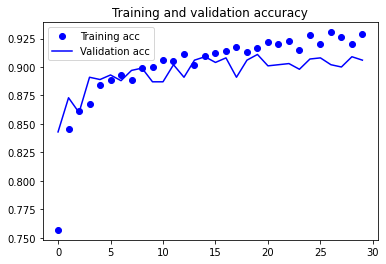

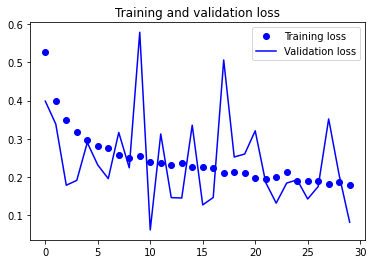

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [63]:
[i.name for i in conv_base.layers]

['input_1',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_pool']

In [65]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [66]:
[i.trainable for i in conv_base.layers]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True]

In [67]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 25s 250ms/step - loss: 0.1800 - acc: 0.9325 - val_loss: 0.2623 - val_acc: 0.9080
Epoch 2/100
100/100 [==============================] - 25s 245ms/step - loss: 0.1546 - acc: 0.9385 - val_loss: 0.1446 - val_acc: 0.9140
Epoch 3/100
100/100 [==============================] - 24s 244ms/step - loss: 0.1364 - acc: 0.9420 - val_loss: 0.2028 - val_acc: 0.8960
Epoch 4/100
100/100 [==============================] - 24s 244ms/step - loss: 0.1261 - acc: 0.9475 - val_loss: 0.0965 - val_acc: 0.9200
Epoch 5/100
100/100 [==============================] - 24s 244ms/step - loss: 0.1030 - acc: 0.9600 - val_loss: 0.7901 - val_acc: 0.9150
Epoch 6/100
100/100 [==============================] - 24s 244ms/step - loss: 0.0840 - acc: 0.9690 - val_loss: 0.0195 - val_acc: 0.9160
Epoch 7/100
100/100 [==============================] - 24s 244ms/step - loss: 0.0717 - acc: 0.9715 - val_loss: 0.0059 - val_acc: 0.9170
Epoch 8/100
100/100 [===========================

In [68]:
model.save('cats_and_dogs_small_4.h5')

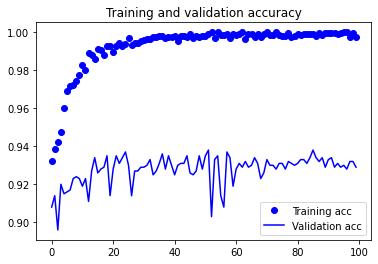

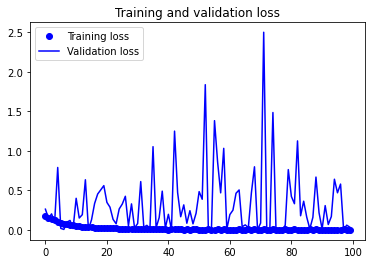

In [69]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

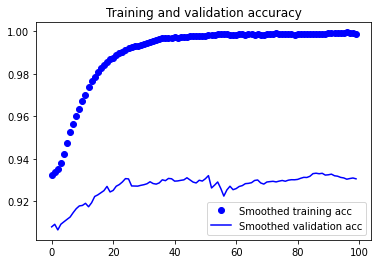

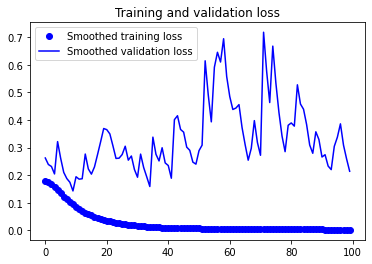

In [70]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

In [71]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9350000023841858
